<a href="https://colab.research.google.com/github/edgarbernaling-arch/Desafio_1_Ciencia_de_datos_Edgar_Bernal/blob/main/Copia_de_AluraStoreLatam_Challegue1_Ciencia_de_datos_Edgar_Bernal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#### ----- Limpieza de datos ----

In [2]:
todas_las_tiendas = [tienda, tienda2, tienda3, tienda4]
df_consolidado = pd.concat(todas_las_tiendas, ignore_index=True)

print("--- 🔢 Conteo de Valores Nulos por Columna ---")
nulos_conteo = df_consolidado.isnull().sum()
nulos_porcentaje = (nulos_conteo / len(df_consolidado)) * 100

df_nulos = pd.DataFrame({
    'Total Nulos': nulos_conteo,
    'Porcentaje (%)': nulos_porcentaje.round(2)
})

# Filtrar solo las columnas que tienen al menos un valor nulo
df_nulos = df_nulos[df_nulos['Total Nulos'] > 0].sort_values(by='Total Nulos', ascending=False)

if df_nulos.empty:
    print("\n✅ ¡No se encontraron valores nulos en el DataFrame consolidado!")
else:
    print(df_nulos.to_markdown())

--- 🔢 Conteo de Valores Nulos por Columna ---

✅ ¡No se encontraron valores nulos en el DataFrame consolidado!


#### ----- Remover registros inconsistentes -----

In [3]:
registros_antes = len(df_consolidado)

#  Remoción de Precios iguales a 0 (Valor de alquiler = 0) ---
# Usamos el método .query() para seleccionar solo las filas donde el 'Precio' es mayor que 0.
df_limpio = df_consolidado.query('Precio > 0').copy()

#  Contar las filas después de la primera remoción
registros_despues_precio = len(df_limpio)
registros_eliminados_precio = registros_antes - registros_despues_precio

#  Remoción de Costo de Envío iguales a 0 (Condominio = 0) ---
#  Eliminamos las filas donde el 'Costo de envío' es 0 del DataFrame ya filtrado (df_limpio)
df_limpio = df_limpio.query('`Costo de envío` > 0').copy()

#  Contar las filas finales
registros_finales = len(df_limpio)
registros_eliminados_total = registros_antes - registros_finales

print("--- 🗑️ Limpieza de Registros Inconsistentes ---")
print(f"Registros iniciales: {registros_antes}")
print(f"Registros con Precio = 0 eliminados: {registros_eliminados_precio}")
print(f"Registros con Costo de envío = 0 eliminados (adicionalmente): {registros_despues_precio - registros_finales}")
print(f"-------------------------------------------------")
print(f"Registros finales en el DataFrame: {registros_finales}")
print(f"Total de registros eliminados: {registros_eliminados_total}")

# Sobreescribimos el DataFrame consolidado con la versión limpia para continuar el análisis
df_consolidado = df_limpio

--- 🗑️ Limpieza de Registros Inconsistentes ---
Registros iniciales: 9435
Registros con Precio = 0 eliminados: 0
Registros con Costo de envío = 0 eliminados (adicionalmente): 827
-------------------------------------------------
Registros finales en el DataFrame: 8608
Total de registros eliminados: 827


# 1. Análisis con facturación

### Ingresos por tiendas

In [4]:
#  Calcular el ingreso total para cada tienda (suma de la columna 'Precio')
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

#  Mostrar los resultados
print(f"Ingreso Total Tienda 1: {ingreso_total_tienda1:,.1f}")
print(f"Ingreso Total Tienda 2: {ingreso_total_tienda2:,.1f}")
print(f"Ingreso Total Tienda 3: {ingreso_total_tienda3:,.1f}")
print(f"Ingreso Total Tienda 4: {ingreso_total_tienda4:,.1f}")

Ingreso Total Tienda 1: 1,150,880,400.0
Ingreso Total Tienda 2: 1,116,343,500.0
Ingreso Total Tienda 3: 1,098,019,600.0
Ingreso Total Tienda 4: 1,038,375,700.0


#### (Tienda 1) la que mas vendio

### GRÁFICO:

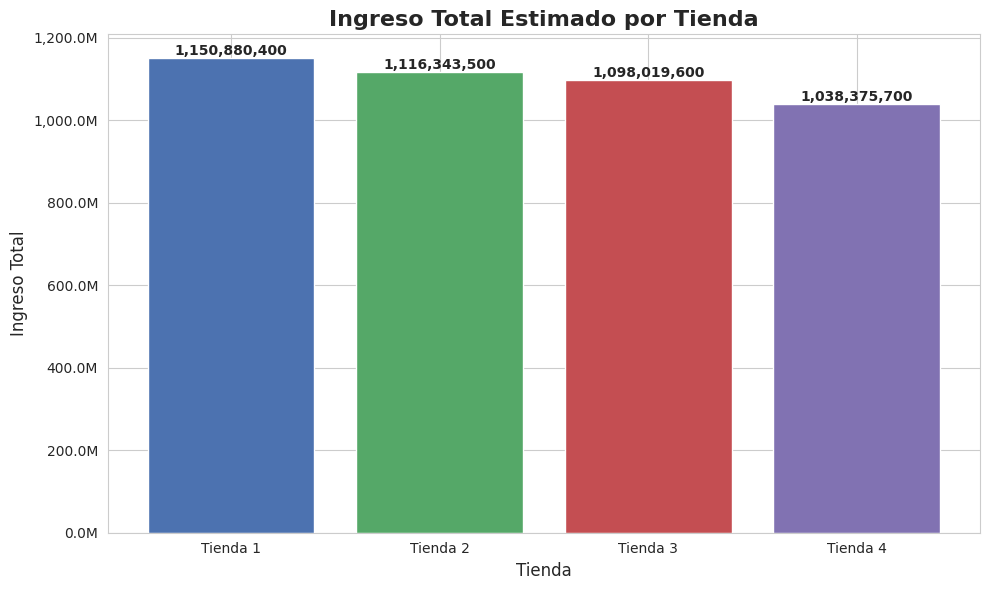

In [5]:
from matplotlib.ticker import FuncFormatter
dataframes = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}
#  Datos de ingresos totales (suma de la columna 'Precio')
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
}
df_ingresos = pd.DataFrame(data)

#  Configuración del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

#  Crear el gráfico de barras
bars = plt.bar(df_ingresos['Tienda'], df_ingresos['Ingreso Total'], color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

#  Etiquetas y título
plt.title('Ingreso Total Estimado por Tienda', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total', fontsize=12)

#  Función para formatear el eje Y en millones (M)
def millions_formatter(x, pos):
    return f'{x/1e6:,.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

#  Agregar el valor exacto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500000,
             f'{yval:,.0f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [6]:
print("Variables cargadas y el diccionario 'dataframes' definido.")
# Iterar sobre cada DataFrame para calcular y mostrar el conteo de ventas
for nombre_tienda, df in dataframes.items():

    df_conteo = df.groupby('Categoría del Producto')['Producto'].count().reset_index(name="Ventas")

    # ORDENAR de mayor a menor (ascending=False)
    df_conteo = df_conteo.sort_values(by='Ventas', ascending=False)

    # Imprimir la tabla
    print(f"## 🛍️ {nombre_tienda}")
    print(df_conteo.to_markdown(index=False))
    print("-------------------------------------------------------------------")

Variables cargadas y el diccionario 'dataframes' definido.
## 🛍️ Tienda 1
| Categoría del Producto   |   Ventas |
|:-------------------------|---------:|
| Muebles                  |      465 |
| Electrónicos             |      448 |
| Juguetes                 |      324 |
| Electrodomésticos        |      312 |
| Deportes y diversión     |      284 |
| Instrumentos musicales   |      182 |
| Libros                   |      173 |
| Artículos para el hogar  |      171 |
-------------------------------------------------------------------
## 🛍️ Tienda 2
| Categoría del Producto   |   Ventas |
|:-------------------------|---------:|
| Muebles                  |      442 |
| Electrónicos             |      422 |
| Juguetes                 |      313 |
| Electrodomésticos        |      305 |
| Deportes y diversión     |      275 |
| Instrumentos musicales   |      224 |
| Libros                   |      197 |
| Artículos para el hogar  |      181 |
-------------------------------------------

#### Muebles el producto que más se vendio

### GRÁFICO:

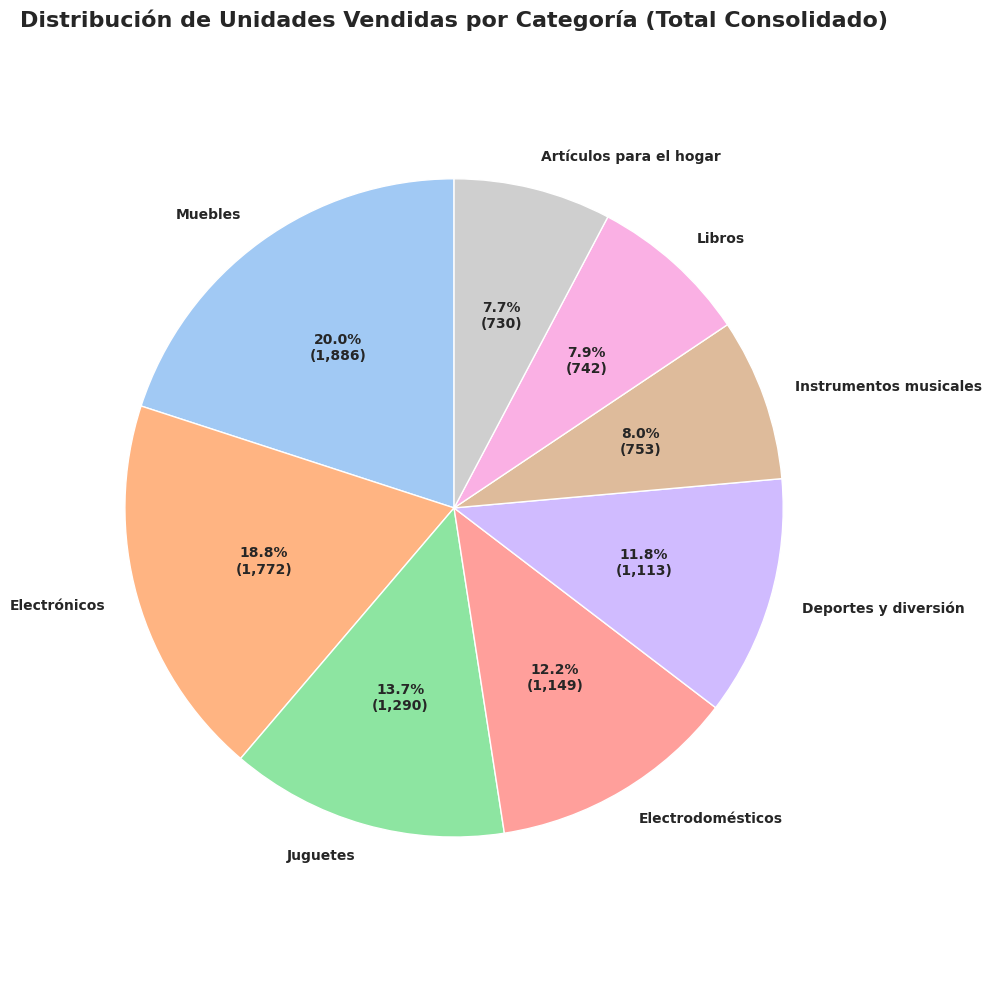

In [7]:
todas_las_tiendas = [tienda, tienda2, tienda3, tienda4]
df_consolidado = pd.concat(todas_las_tiendas, ignore_index=True)

# Agrupar por 'Categoría del Producto' y contar la columna 'Producto'
# Esto define la variable df_conteo_total que faltaba
df_conteo_total = df_consolidado.groupby('Categoría del Producto')['Producto'].count().reset_index(name="Ventas")
df_conteo_total = df_conteo_total.sort_values(by='Ventas', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))

# Preparar los datos para el gráfico de torta
conteo = df_conteo_total['Ventas']
etiquetas = df_conteo_total['Categoría del Producto']

# Crear el gráfico de torta
plt.pie(
    conteo,
    labels=etiquetas,
    # Muestra el porcentaje (%.1f) y el conteo de unidades (unidades vendidas)
    autopct=lambda p: f'{p:.1f}%\n({round(p * sum(conteo) / 100):,})',
    startangle=90,
    colors=sns.color_palette("pastel"),
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Título
plt.title('Distribución de Unidades Vendidas por Categoría (Total Consolidado)', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de las tiendas


In [8]:
calif_promedio_tienda1 = tienda['Calificación'].mean()
calif_promedio_tienda2 = tienda2['Calificación'].mean()
calif_promedio_tienda3 = tienda3['Calificación'].mean()
calif_promedio_tienda4 = tienda4['Calificación'].mean()

#  Crear un DataFrame de resultados
df_calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [
        calif_promedio_tienda1,
        calif_promedio_tienda2,
        calif_promedio_tienda3,
        calif_promedio_tienda4
    ]
})

# Ordenar y formatear los resultados
df_calificaciones = df_calificaciones.sort_values(by='Calificación Promedio', ascending=False)
df_calificaciones['Calificación Promedio'] = df_calificaciones['Calificación Promedio'].map('{:.2f}'.format)

# --- RESULTADOS ---

print("--- EJERCICIO 3: CALIFICACIÓN PROMEDIO DE LAS TIENDAS ---")
print(df_calificaciones.to_markdown(index=False))
print("---------------------------------------------------------")

--- EJERCICIO 3: CALIFICACIÓN PROMEDIO DE LAS TIENDAS ---
| Tienda   |   Calificación Promedio |
|:---------|------------------------:|
| Tienda 3 |                    4.05 |
| Tienda 2 |                    4.04 |
| Tienda 4 |                    4    |
| Tienda 1 |                    3.98 |
---------------------------------------------------------


#### (Tienda 3) calificación más alta

### GRÁFICO:

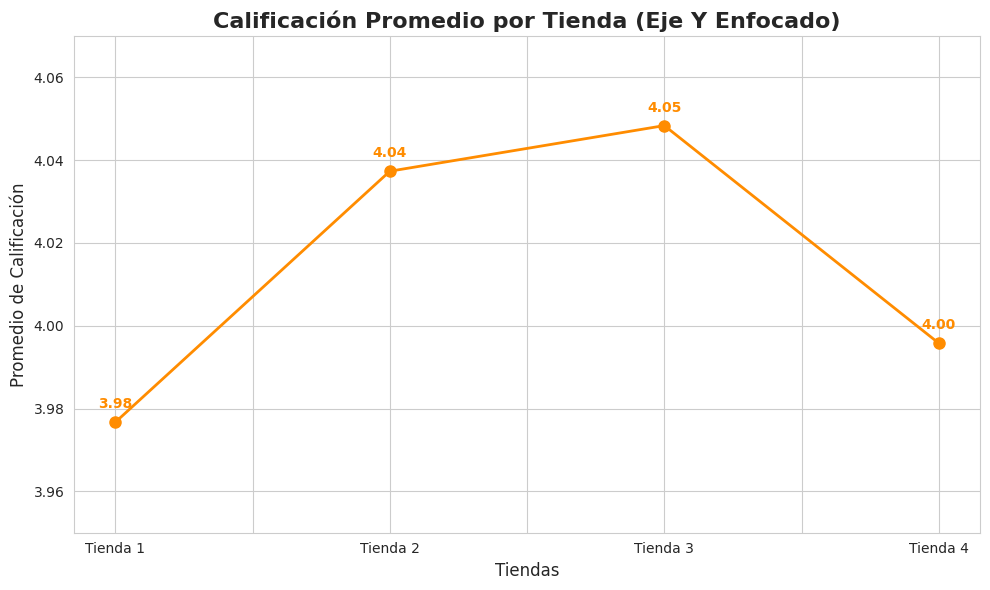

In [9]:
promedio1 = tienda['Calificación'].mean()
promedio2 = tienda2['Calificación'].mean()
promedio3 = tienda3['Calificación'].mean()
promedio4 = tienda4['Calificación'].mean()

# --- PREPARACIÓN DE DATOS ---

promedio = [promedio1, promedio2, promedio3, promedio4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
data = {'Tienda': tiendas, 'Promedio': promedio}
df = pd.DataFrame(data)

# --- GENERACIÓN DEL GRÁFICO ---

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de línea
ax = df.plot(
    kind='line',
    x='Tienda',
    y='Promedio',
    marker='o',
    color='darkorange',
    linewidth=2,
    markersize=8,
    ax=plt.gca()
)

# Añadir etiquetas de valor en cada punto
for i, txt in enumerate(df['Promedio']):
    ax.annotate(
        f'{txt:.2f}',
        (i, txt),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontweight='bold',
        color='darkorange'
    )

# ESTABLECER EL LÍMITE DEL EJE Y
# NOTA: Los promedios reales están entre 3.98 y 4.05, por lo que usaremos ese rango
# para enfocarnos en las diferencias.
plt.ylim(3.95, 4.07)

# Configuración adicional
plt.title('Calificación Promedio por Tienda (Eje Y Enfocado)', fontsize=16, fontweight='bold')
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Promedio de Calificación', fontsize=12)
plt.legend().remove()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [10]:
for nombre_tienda, df in dataframes.items():
    # Agrupar por 'Producto' y contar el número de transacciones (ventas)
    df_ventas_producto = df.groupby('Producto').size().reset_index(name='Total Unidades Vendidas')

    # Ordenar de mayor a menor (Más vendidos)
    df_mas_vendidos = df_ventas_producto.sort_values(by='Total Unidades Vendidas', ascending=False)

    # Ordenar de menor a mayor (Menos vendidos)
    df_menos_vendidos = df_ventas_producto.sort_values(by='Total Unidades Vendidas', ascending=True)

    print(f"## 🏢 {nombre_tienda}")

    # Mostrar Top 3
    print("### 🥇 Top 3 Productos Más Vendidos")
    print(df_mas_vendidos.head(3).to_markdown(index=False))

    # Mostrar Bottom 3
    print("\n### 📉 Top 3 Productos Menos Vendidos")
    print(df_menos_vendidos.head(3).to_markdown(index=False))

    print("\n" + "="*80)

## 🏢 Tienda 1
### 🥇 Top 3 Productos Más Vendidos
| Producto      |   Total Unidades Vendidas |
|:--------------|--------------------------:|
| Armario       |                        60 |
| TV LED UHD 4K |                        60 |
| Microondas    |                        60 |

### 📉 Top 3 Productos Menos Vendidos
| Producto                  |   Total Unidades Vendidas |
|:--------------------------|--------------------------:|
| Auriculares con micrófono |                        33 |
| Celular ABXY              |                        33 |
| Olla de presión           |                        35 |

## 🏢 Tienda 2
### 🥇 Top 3 Productos Más Vendidos
| Producto                  |   Total Unidades Vendidas |
|:--------------------------|--------------------------:|
| Iniciando en programación |                        65 |
| Microondas                |                        62 |
| Batería                   |                        61 |

### 📉 Top 3 Productos Menos Vendidos
| Producto     

#### Los productos que más y menos se vendieron corresponden a la tienda 2 que corresponden a iniciando en programación y juego de mesa.

### GRÁFICO:

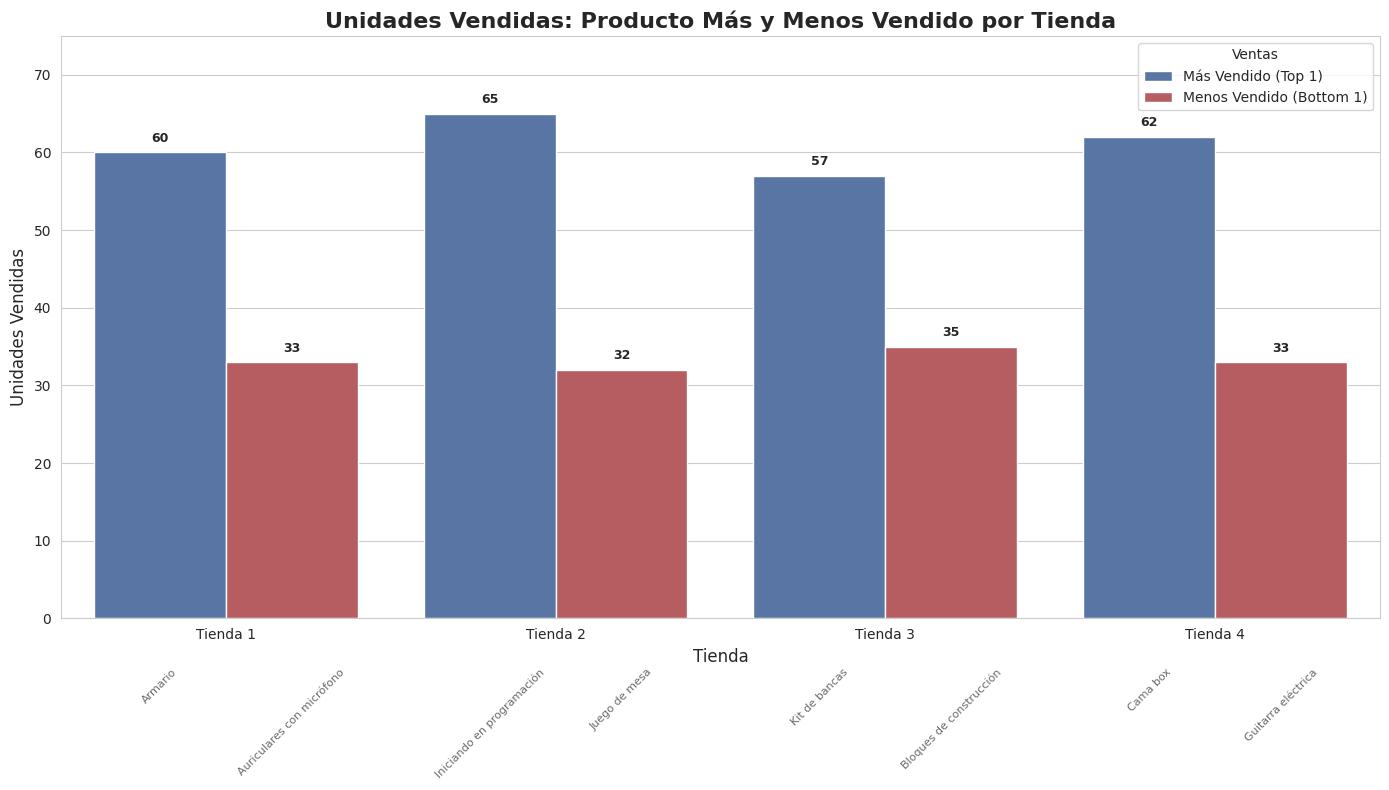

In [11]:
datos_comparativos = []

for nombre_tienda, df in dataframes.items():
    df_ventas = df.groupby('Producto').size().reset_index(name='Ventas')
    df_top1 = df_ventas.sort_values(by='Ventas', ascending=False).iloc[0]
    df_bottom1 = df_ventas.sort_values(by='Ventas', ascending=True).iloc[0]

    datos_comparativos.append({
        'Tienda': nombre_tienda,
        'Tipo': 'Más Vendido (Top 1)',
        'Producto': df_top1['Producto'],
        'Unidades': df_top1['Ventas']
    })
    datos_comparativos.append({
        'Tienda': nombre_tienda,
        'Tipo': 'Menos Vendido (Bottom 1)',
        'Producto': df_bottom1['Producto'],
        'Unidades': df_bottom1['Ventas']
    })

df_comparativo = pd.DataFrame(datos_comparativos)

# Ordenamos el DataFrame para que coincida con el orden de los parches (agrupado por 'Tipo' y luego por 'Tienda')
df_comparativo_sync = df_comparativo.sort_values(by=['Tipo', 'Tienda'], ascending=[False, True]).reset_index(drop=True)


# --- GENERACIÓN DEL GRÁFICO DE BARRAS AGRUPADAS ---

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Usar Seaborn para un gráfico de barras agrupadas
ax = sns.barplot(
    data=df_comparativo_sync, # Usamos el DataFrame sincronizado
    x='Tienda',
    y='Unidades',
    hue='Tipo',
    palette={'Más Vendido (Top 1)': '#4C72B0', 'Menos Vendido (Bottom 1)': '#C44E52'}
)

# Configuración de Títulos y Ejes
plt.title('Unidades Vendidas: Producto Más y Menos Vendido por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.legend(title='Ventas')

# AÑADIR ETIQUETAS: El bucle ahora usará el DataFrame sincronizado.
num_datos = len(df_comparativo_sync)

for i, p in enumerate(ax.patches):
    if i >= num_datos:
        break

    # Obtener la data para la etiqueta del DataFrame sincronizado
    product_name = df_comparativo_sync['Producto'].iloc[i]
    sales = df_comparativo_sync['Unidades'].iloc[i]

    #  Posicionar el texto (unidades vendidas)
    ax.annotate(
        f'{sales}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10),
        textcoords='offset points', fontsize=9, fontweight='bold'
    )

    #  Posicionar el texto del producto
    ax.annotate(
        product_name,
        (p.get_x() + p.get_width() / 2., 0),
        ha='center', va='top', xytext=(0, -35),
        textcoords='offset points',
        fontsize=8,
        rotation=45,
        color='dimgray'
    )

plt.ylim(0, df_comparativo_sync['Unidades'].max() + 10)
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [12]:
#----- CÁLCULO DEL PROMEDIO DE ENVÍO -----

costo_envio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_tienda4 = tienda4['Costo de envío'].mean()

# ----- PREPARACIÓN DEL DATAFRAME DE RESULTADOS -----

data_envios = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [
        costo_envio_tienda1,
        costo_envio_tienda2,
        costo_envio_tienda3,
        costo_envio_tienda4
    ]
}
df_envios = pd.DataFrame(data_envios)

# Ordenar por el costo promedio de mayor a menor
df_envios = df_envios.sort_values(by='Costo de Envío Promedio', ascending=False)

# ----- IMPRESIÓN DE RESULTADOS -----

print("--- ENVÍO PROMEDIO POR TIENDA ---")

# Formatear el costo con separadores de miles y sin decimales (moneda local)
df_envios['Costo de Envío Promedio'] = df_envios['Costo de Envío Promedio'].map('${:,.0f}'.format)

print(df_envios.to_markdown(index=False))
print("-----------------------------------")

--- ENVÍO PROMEDIO POR TIENDA ---
| Tienda   | Costo de Envío Promedio   |
|:---------|:--------------------------|
| Tienda 1 | $26,019                   |
| Tienda 2 | $25,216                   |
| Tienda 3 | $24,806                   |
| Tienda 4 | $23,459                   |
-----------------------------------


#### El mayor promedio de costo de envio fue la (tienda 1)

### GRÁFICO:

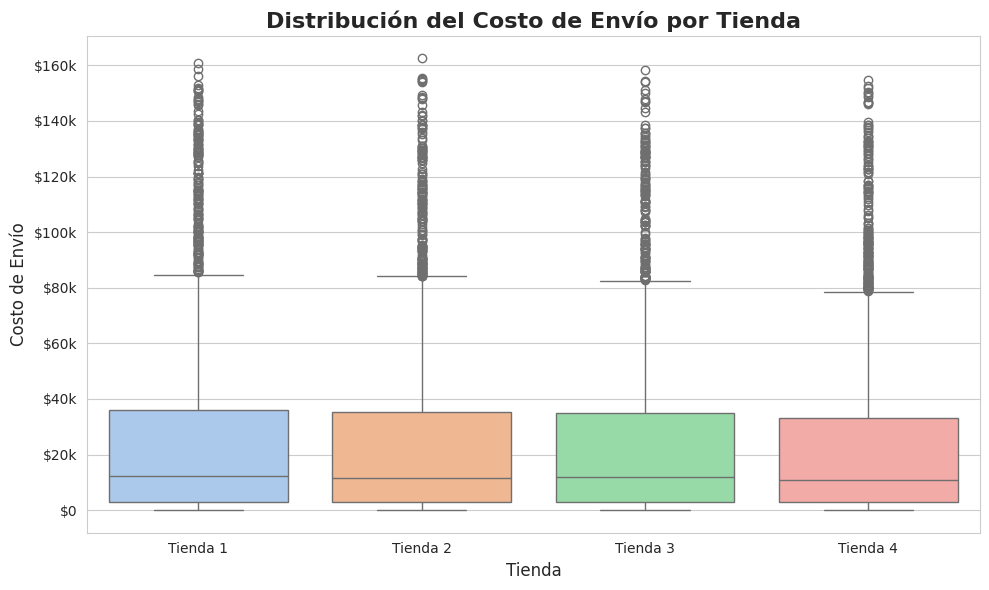

In [13]:
# Unir todos los DataFrames en uno solo, añadiendo la columna 'Tienda'
df_consolidado = pd.concat([
    df.assign(Tienda=name)
    for name, df in dataframes.items()
], ignore_index=True)


# --- GENERACIÓN DEL GRÁFICO BOX PLOT ---

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Usar Seaborn para crear el boxplot
sns.boxplot(
    x='Tienda',
    y='Costo de envío',
    data=df_consolidado,
    hue='Tienda',
    legend=False,
    palette='pastel'
)

# Configuración de Títulos y Ejes
plt.title('Distribución del Costo de Envío por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío', fontsize=12)

# Formatear el eje Y
def currency_formatter(x, pos):
    if x >= 1000:
        return f'${int(x/1000):,}k'
    return f'${int(x):,}'

formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Análisis de desempeño geográfico

In [14]:
if 'Ingreso Total' not in df_consolidado.columns:
    df_consolidado['Ingreso Total'] = df_consolidado['Precio'] + df_consolidado['Costo de envío']

# Agrupar por Lugar de Compra y calcular las métricas, incluyendo coordenadas promedio
df_desempeno_geografico = df_consolidado.groupby('Lugar de Compra').agg(
    Ingreso_Total=('Ingreso Total', 'sum'),
    Volumen_Ventas=('Producto', 'count'),
    Calificacion_Promedio=('Calificación', 'mean'),
    lat=('lat', 'mean'), # Coordenadas promedio para el plot
    lon=('lon', 'mean')
).reset_index()

# Ordenar por Ingreso Total (el KPI más importante)
df_desempeno_geografico = df_desempeno_geografico.sort_values(
    by='Ingreso_Total',
    ascending=False
)

print("--- DESEMPEÑO GEOGRÁFICO POR CIUDAD ---")
# Formatear la salida para la tabla
df_desempeno_geografico['Ingreso_Total_Muestra'] = df_desempeno_geografico['Ingreso_Total'].map('${:,.0f}'.format)
df_desempeno_geografico['Calificacion_Promedio'] = df_desempeno_geografico['Calificacion_Promedio'].map('{:.2f}'.format)

# Seleccionar solo las columnas relevantes para la tabla
df_tabla = df_desempeno_geografico[['Lugar de Compra', 'Ingreso_Total_Muestra', 'Volumen_Ventas', 'Calificacion_Promedio']]
df_tabla.columns = ['Ciudad', 'Ingreso Total', 'Volumen de Ventas', 'Calificación Promedio']

print(df_tabla.to_markdown(index=False))

--- DESEMPEÑO GEOGRÁFICO POR CIUDAD ---
| Ciudad        | Ingreso Total   |   Volumen de Ventas |   Calificación Promedio |
|:--------------|:----------------|--------------------:|------------------------:|
| Bogotá        | $1,911,588,300  |                3943 |                    4.11 |
| Medellín      | $1,155,171,800  |                2314 |                    3.93 |
| Cali          | $533,440,000    |                1007 |                    4.05 |
| Pereira       | $237,927,600    |                 517 |                    4.01 |
| Barranquilla  | $139,075,100    |                 310 |                    3.8  |
| Cartagena     | $107,855,200    |                 242 |                    4.02 |
| Cúcuta        | $104,688,200    |                 186 |                    3.94 |
| Bucaramanga   | $95,422,300     |                 181 |                    3.98 |
| Riohacha      | $77,812,500     |                 163 |                    3.9  |
| Leticia       | $70,745,000     | 

#### GRÁFICO:

/tmp/ipython-input-1047074329.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ciudades, rotation=45, ha="right")


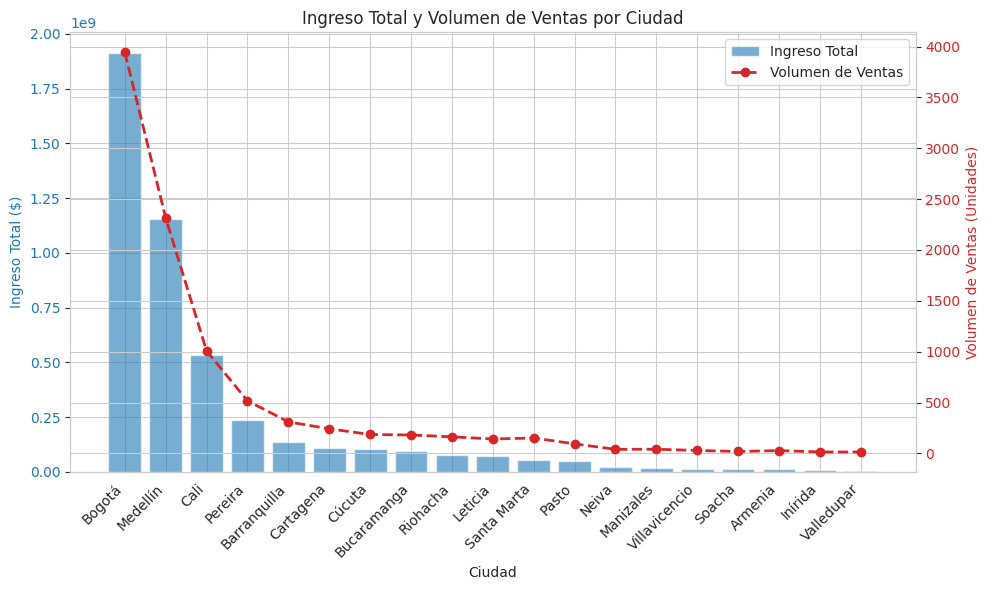

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que este DataFrame esté disponible.
# Si la columna Ingreso_Total_Muestra tiene el símbolo '$', necesitamos usar la columna Ingreso_Total original (numérica)
df_plot = df_desempeno_geografico.copy()

# Ordenar los datos por Ingreso Total de mayor a menor para una mejor visualización
df_plot = df_plot.sort_values(by='Ingreso_Total', ascending=False)

# Datos para el gráfico
ciudades = df_plot['Lugar de Compra']
ingresos = df_plot['Ingreso_Total']
volumen = df_plot['Volumen_Ventas']

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Eje Y Izquierdo (ax1) para el Ingreso Total ---
color_ingreso = 'tab:blue'
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Ingreso Total ($)', color=color_ingreso)
bars_ingreso = ax1.bar(
    ciudades,
    ingresos,
    color=color_ingreso,
    alpha=0.6,
    label='Ingreso Total'
)
ax1.tick_params(axis='y', labelcolor=color_ingreso)
ax1.set_xticklabels(ciudades, rotation=45, ha="right")

# --- Eje Y Derecho (ax2) para el Volumen de Ventas ---
ax2 = ax1.twinx() # Crea un segundo eje Y que comparte el mismo Eje X
color_volumen = 'tab:red'
ax2.set_ylabel('Volumen de Ventas (Unidades)', color=color_volumen)
line_volumen = ax2.plot(
    ciudades,
    volumen,
    color=color_volumen,
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Volumen de Ventas'
)
ax2.tick_params(axis='y', labelcolor=color_volumen)

# --- Título y Leyenda ---
plt.title('Ingreso Total y Volumen de Ventas por Ciudad')

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Mejorar el diseño y mostrar el gráfico
fig.tight_layout()
plt.show()


In [16]:
dataframes_con_nombre = [
    tienda.assign(Tienda_ID='Tienda 1'),
    tienda2.assign(Tienda_ID='Tienda 2'),
    tienda3.assign(Tienda_ID='Tienda 3'),
    tienda4.assign(Tienda_ID='Tienda 4')
]

# Consolidar el DataFrame
df_consolidado_con_tienda = pd.concat(dataframes_con_nombre, ignore_index=True)

# Recalcular Ingreso Total y Limpieza (filtrar Precio > 0 y Costo de envío > 0)
df_consolidado_con_tienda['Ingreso Total'] = df_consolidado_con_tienda['Precio'] + df_consolidado_con_tienda['Costo de envío']
df_consolidado_con_tienda = df_consolidado_con_tienda.query('Precio > 0 and `Costo de envío` > 0').copy()

In [17]:
df_ingreso_tienda_ciudad = df_consolidado_con_tienda.groupby(
    ['Lugar de Compra', 'Tienda_ID']
)['Ingreso Total'].sum().reset_index()

# Crear la tabla dinámica: Ciudad en filas y Tienda en columnas
df_pivot = df_ingreso_tienda_ciudad.pivot_table(
    index='Lugar de Compra',
    columns='Tienda_ID',
    values='Ingreso Total',
    fill_value=0 # Las ciudades donde una tienda no vendió se muestran con $0
)

# Añadir una columna de "Total por Ciudad" para fácil referencia
df_pivot['Total Ciudad'] = df_pivot.sum(axis=1)

# Ordenar la tabla por el Ingreso Total de la Ciudad (de mayor a menor)
df_pivot = df_pivot.sort_values(by='Total Ciudad', ascending=False)

# --- Impresión de la Tabla ---

print("\n--- 💵 INGRESO TOTAL DESGLOSADO POR CIUDAD Y TIENDA ---")

# Formatear todos los valores de la tabla para visualización en formato de moneda
for col in df_pivot.columns:
    df_pivot[col] = df_pivot[col].map('${:,.0f}'.format)

print(df_pivot.to_markdown())


--- 💵 INGRESO TOTAL DESGLOSADO POR CIUDAD Y TIENDA ---
| Lugar de Compra   | Tienda 1     | Tienda 2     | Tienda 3     | Tienda 4     | Total Ciudad   |
|:------------------|:-------------|:-------------|:-------------|:-------------|:---------------|
| Bogotá            | $460,770,700 | $502,650,500 | $498,507,100 | $438,811,900 | $1,900,740,200 |
| Medellín          | $311,326,800 | $311,435,300 | $262,414,100 | $264,065,900 | $1,149,242,100 |
| Cali              | $161,859,500 | $123,982,700 | $114,637,800 | $130,449,800 | $530,929,800   |
| Pereira           | $58,669,300  | $44,983,800  | $65,406,100  | $67,170,000  | $236,229,200   |
| Barranquilla      | $34,404,000  | $28,974,700  | $38,508,000  | $36,264,600  | $138,151,300   |
| Cartagena         | $23,327,200  | $22,404,100  | $35,809,400  | $25,588,100  | $107,128,800   |
| Cúcuta            | $39,832,900  | $30,476,400  | $26,370,500  | $7,697,400   | $104,377,200   |
| Bucaramanga       | $18,438,900  | $25,100,700  | $

#### GRÁFICO:

<Figure size 1200x1000 with 0 Axes>

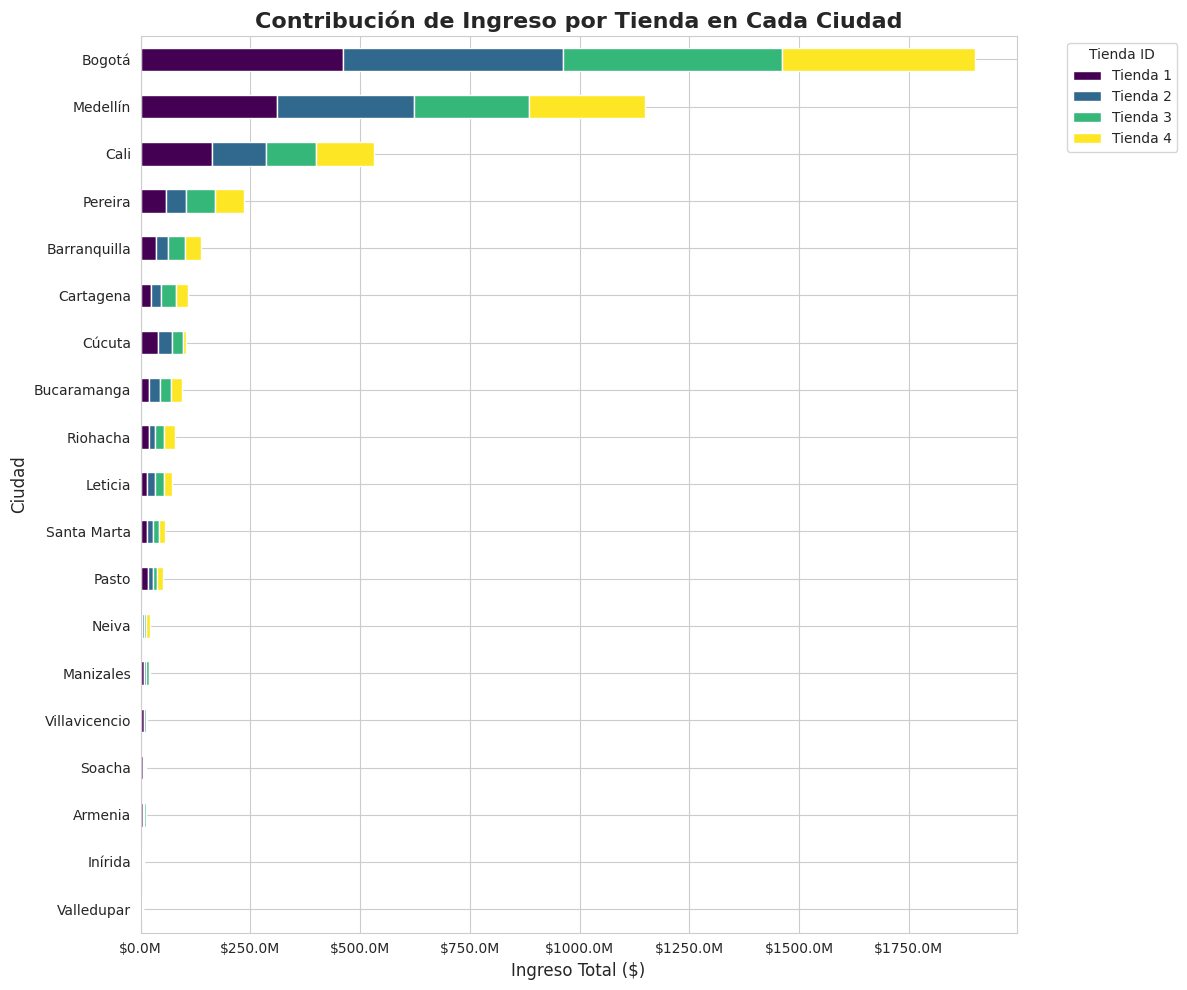

In [18]:
# 1. Quitar el formato de moneda y convertir a numérico para graficar
df_plot_data = df_pivot.copy()

# Remover el formato y convertir a float
for col in df_plot_data.columns:
    try:
        # Eliminar '$', ',' y convertir a float
        df_plot_data[col] = df_plot_data[col].astype(str).str.replace('$', '').str.replace(',', '', regex=False).astype(float)
    except:
        pass # Si ya era numérico o si falla la conversión

# Quitar la columna 'Total Ciudad' del set de contribución para el gráfico apilado
df_plot_data_contribucion = df_plot_data.drop(columns=['Total Ciudad'])

# Ordenar el DataFrame usando el índice (Lugar de Compra) después de ordenarlo por la suma total.
# Esto asegura que la Series de suma se usa para ordenar el índice (ciudades).
suma_total_por_ciudad = df_plot_data_contribucion.sum(axis=1)
df_plot_data_contribucion = df_plot_data_contribucion.loc[suma_total_por_ciudad.sort_values(ascending=True).index]
# ------------------------


# 2. Generación del Gráfico de Barras Apiladas Horizontal
plt.figure(figsize=(12, 10))

# Generar el gráfico apilado (usando plot.barh)
ax = df_plot_data_contribucion.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 10),
    colormap='viridis' # Esquema de color para distinguir tiendas
)

# Configuración de Ejes y Títulos
ax.set_title('Contribución de Ingreso por Tienda en Cada Ciudad', fontsize=16, fontweight='bold')
ax.set_xlabel('Ingreso Total ($)', fontsize=12)
ax.set_ylabel('Ciudad', fontsize=12)

# Formatear el eje X para mostrar valores en millones (M)
from matplotlib.ticker import FuncFormatter
def millones_formatter(x, pos):
    return f'${x/1e6:.1f}M'
ax.xaxis.set_major_formatter(FuncFormatter(millones_formatter))

# Colocar la leyenda fuera del gráfico
ax.legend(title='Tienda ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Mapa de calor

In [19]:
columnas_a_codificar = ['Método de pago', 'Categoría del Producto']

#  Aplicar One-Hot Encoding al DataFrame limpio (df_consolidado)
df_codificado = pd.get_dummies(
    df_consolidado,
    columns=columnas_a_codificar,
    drop_first=True, # Recomendado para evitar multicolinealidad
    prefix=columnas_a_codificar
)

print("✅ DataFrame 'df_codificado' creado correctamente. Ahora puedes ejecutar el código de correlación.")

✅ DataFrame 'df_codificado' creado correctamente. Ahora puedes ejecutar el código de correlación.


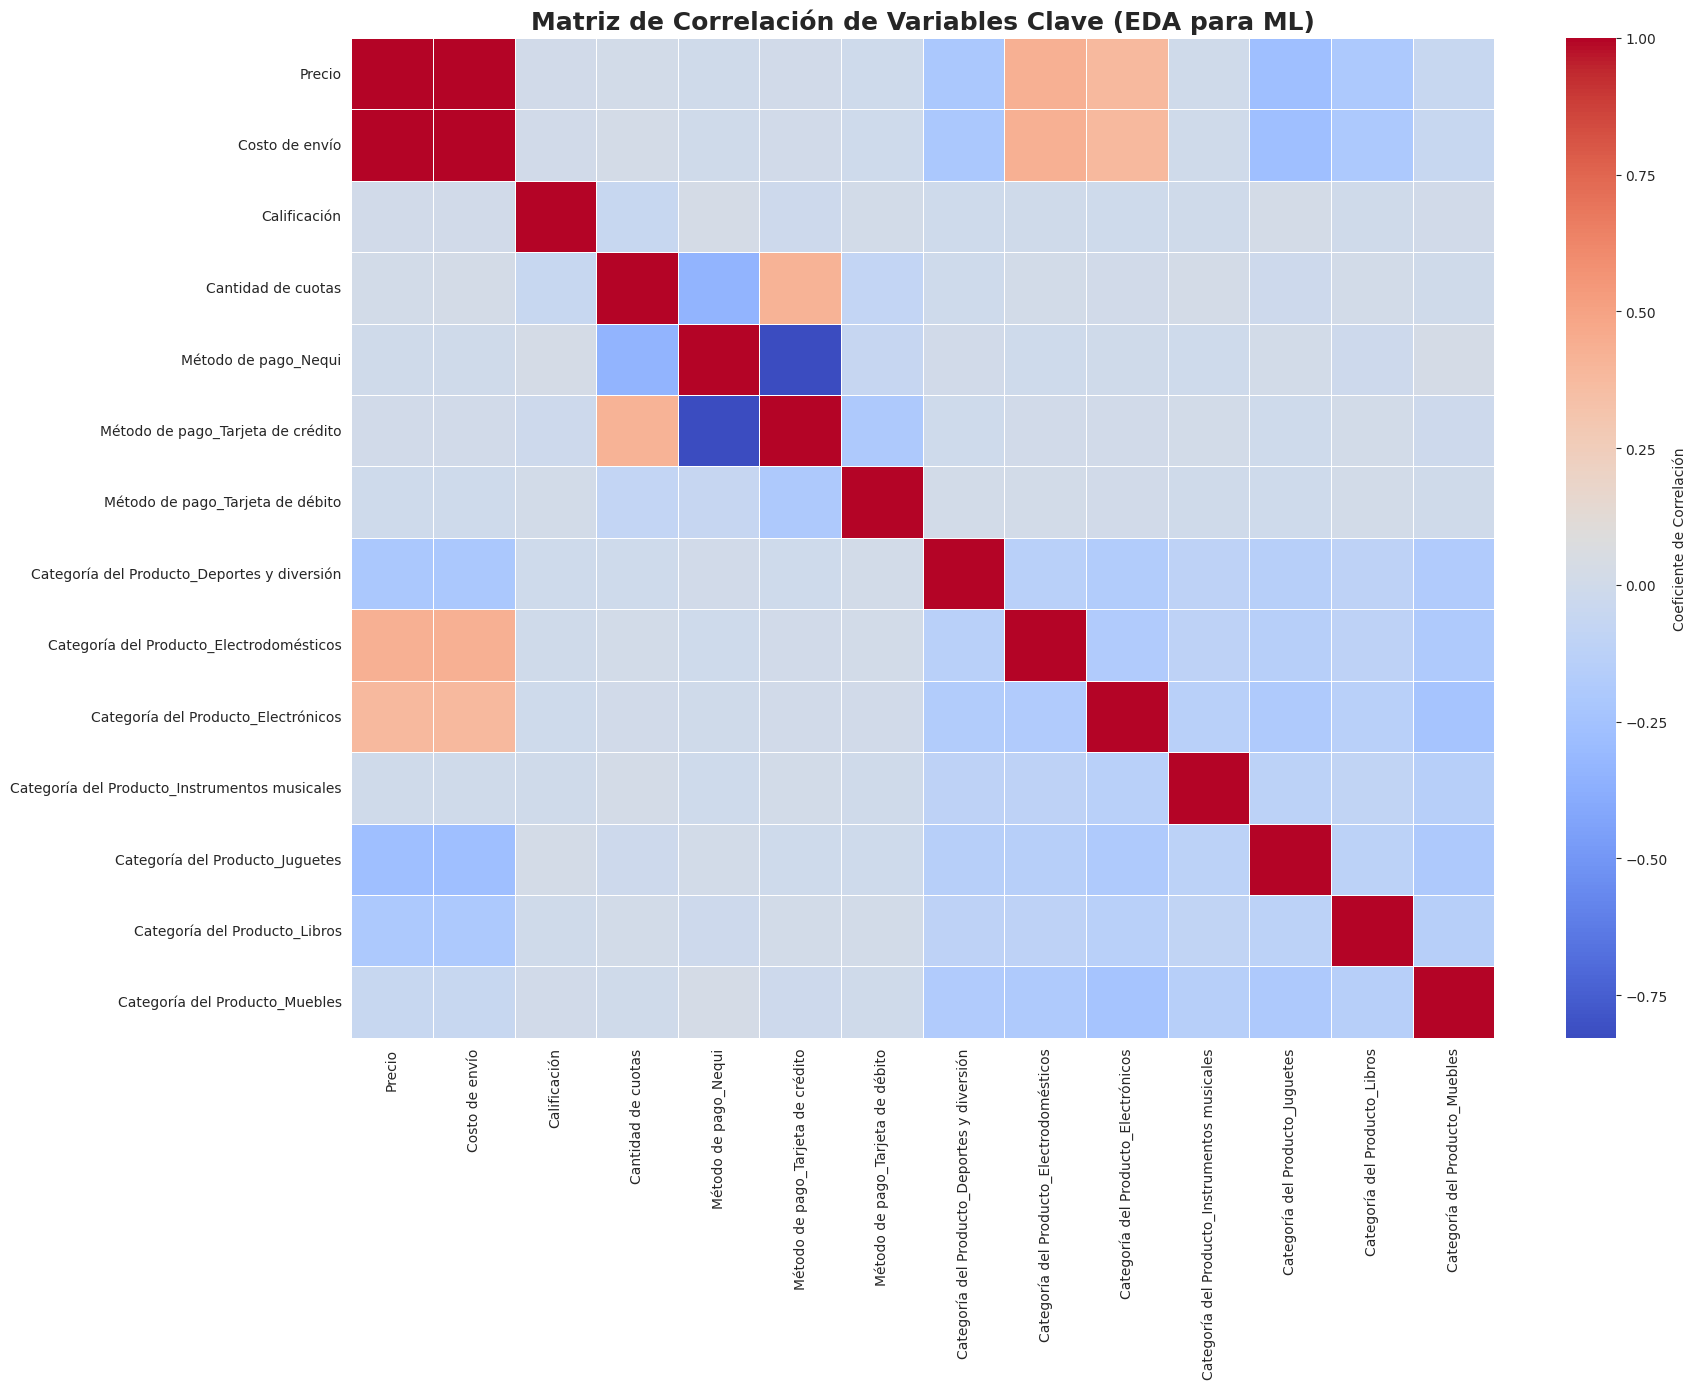

In [20]:
columnas_heatmap = [
    'Precio',
    'Costo de envío',
    'Calificación',
    'Cantidad de cuotas',
    # Las columnas categóricas codificadas (dummies)
    *[col for col in df_codificado.columns if col.startswith('Método de pago_') or col.startswith('Categoría del Producto_')]
]

# Filtramos para asegurar que solo incluimos columnas existentes
columnas_heatmap = [col for col in columnas_heatmap if col in df_codificado.columns]

df_correlacion = df_codificado[columnas_heatmap]

# ----- CALCULAR LA MATRIZ DE CORRELACIÓN -----
matriz_correlacion = df_correlacion.corr()

# ----- GENERAR EL MAPA DE CALOR -----

plt.figure(figsize=(18, 14)) # Tamaño ajustado para muchas variables
sns.heatmap(
    matriz_correlacion,
    annot=False,  # Se establece en False debido a la gran cantidad de variables
    cmap='coolwarm', # Muestra la correlación positiva (rojo) y negativa (azul)
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlación'}
)

plt.title('Matriz de Correlación de Variables Clave (EDA para ML)', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#  📄 Informe Ejecutivo: Evaluación de Rendimiento de Tiendas

## 1. Introducción y Objetivo

El presente informe tiene como objetivo principal evaluar el desempeño operativo y financiero de las cuatro tiendas de comercio electrónico (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) para determinar cuál de ellas presenta el menor rendimiento general .

El resultado de este análisis proporcionará al Señor Juan una base de datos sólida para tomar la decisión estratégica de vender la tienda con peor desempeño e invertir el capital liberado en un nuevo negocio, maximizando así la eficiencia de su portafolio de activos. La evaluación se centra en cinco indicadores claves: Ingreso Total , Ventas por categorías, Satisfacción del Cliente (Calificación Promedio), Productos vendidos y Envios promedios.

## 2. Análisis Detallado del Desempeño

### 💰 Análisis de Facturación (Ingreso Total)

#### Se calcula el Ingreso Total (o Ventas Brutas) sumando la columna 'Precio'de cada DataFrame de tienda, lo que lo convierte en el KPI financiero más fundamental .

*   Identificación de la Dominancia: Muestra qué tiendas ( Tienda 1) es la principal fuente de capital . Esta tienda justifica la mayor parte de la inversión y los recursos.
*   Señal de Alerta: Resalta la tienda con la menor facturación (Tienda 4 ).

*   Decisión: Esta métrica es la base para la decisión del Señor Juan, ya que la tienda con el menor ingreso total es la candidata más lógica para ser vendida.
##### En resumen: Este análisis indica qué tiendas te hacen ganar más dinero y cuál está rindiendo por debajo del promedio.







### 🛍️ Análisis de Ventas por Categoría.


#### Permite identificar la composición del volumen de ventas de cada tienda.

*   Identificación de la Demanda: Muestra qué categorías de productos ( Muebles, Electrónicos, Electrodomésticos) tienen la mayor rotación y son el motor de volumen para cada tienda individual.
*   Estrategia de Inventario: La categoría con más ventas es la que requiere mayor espacio de almacenamiento y stock de seguridad . Las categorías con pocas ventas podrían estar saturando el inventario.

*   Decisión: Ayuda a la gerencia a enfocar el marketing, la inversión y el espacio físico en las categorías que realmente mueven la aguja del negocio en cada sucursal.

#### En resumen: Indica qué tipo de producto compra más la gente en cada tienda.





### ⭐ Análisis de Calificación Promedio

#### Calcula y compara la calificación promedio de cada tienda.

*   Clave Métrica: La Calificación Promedio es el principal KPI de experiencia del cliente.
*   Uniformidad: Dado que las calificaciones son muy parecidas, esto indica que el nivel de servicio y calidad es consistente en toda la operación. Esto es positivo, ya que no hay una tienda con un fracaso operativo evidente.

*   Identificación del Más Bajo (Tienda 1): Aunque la Tienda 1 tenga la cifra más baja, la diferencia marginal significa que la tienda no está necesariamente "fallando" en servicio; simplemente está ligeramente por debajo del promedio en las opiniones de los clientes.

#### En resumen: Indica qué tan bien se percibe la calidad en cada tienda, pero si las cifras son casi iguales, la decisión de venta debe basarse en otros citerios.





### 📈 Análisis productos más y menos vendidos.

Este análisis ayudara a entender la demanda en los extremos para cada una de las cuatro tiendas.

#### Productos Más Vendidos
#### Estos productos reflejan la clave de demanda de cada mercado.
*   Tienda 1 (Armario): La demanda se centra en Muebles de almacenamiento esenciales . Esto puede indicar que los clientes buscan amoblar o renovar espacios funcionales.

*   Tienda 2 (Iniciando en Programación): La alta demanda es por productos de educación y tecnología , lo que sugiere un nicho de mercado joven o profesional.
*   Tienda 3 (Kit de Bancas): La demanda apunta a Muebles de exterior o soluciones para espacios sociales/comunales .

*   Tienda 4 (Cama Box): La demanda se concentra en Muebles grandes de dormitorio . Es un producto de alto valor y necesidad básica.
#### Implicación Clave: Estos productos deben ser el foco de la inversión en inventario y marketing para cada tienda, ya que son los generadores de ingresos y tráfico.


#### Productos menos vendido
#### Estos productos reflejan la baja demanda consumiendo espacio.

*   Tienda 1 (Auriculares con Micrófono): Artículos tecnológicos periféricos no esenciales.
*   Tienda 2 (Juego de Mesa): Productos de ocio o entretenimiento específicos.

*   Tienda 3 (Bloques de Construcción): Artículos de nicho (posiblemente infantil o coleccionable).
*   Tienda 4 (Guitarra Eléctrica): Artículos de pasatiempo y alto costo con un mercado muy limitado.
#### Implicación Clave: El inventario de estos productos debe ser tenido en cuenta lo antes posible. Su baja rotación inmoviliza capital y recursos que deben destinarse a financiar la compra de más Armarios o Camas Box .











### 🚚 Análisis de Costo de Envío Promedio por Tienda

#### Es crucial porque revela la eficiencia logística y la naturaleza de los productos que vende cada tienda.

*   Tienda 1 (Costo Alto): Si esta tienda es también la de mayor facturación, el alto costo está justificado por el ingreso . La estrategia debe ser optimizar las tarifas de transporte.
*   Tienda 4 (Costo Bajo): Si tiene el costo de envío más bajo pero también el Ingreso Total más bajo (como se comprometen), la tienda no está logrando rentabilizar su eficiencia logística. Este bajo costo no compensa la falta de volumen.
####En resumen: Este análisis indica dónde se concentra el mayor gasto operativo logístico y te permite inferir el tamaño y peso dominante de los productos que vende cada tienda.



#💡Recomendación Final al Señor Juan

### Decisión Estratégica: Vender la Tienda 4.
#### La recomendación es vender la Tienda 4 para liberar capital e invertirlo en el nuevo negocio.

*   Bajo Rendimiento Financiero: La Tienda 4 registra consistentemente el Ingreso Total más bajo del grupo. En un negocio, la generación de capital es el factor decisivo.
*   Bajo Impacto Logístico: Aunque la Tienda 4 tiene el Costo de Envío Promedio más bajo , su eficiencia logística no se traduce en ingresos. El bajo volumen de ventas no justifica mantener la operación.

*   Riesgo Manejable: Aunque la Tienda 1 tiene la calificación más baja, la diferencia es mínima entre todas las tiendas. Por lo tanto, el riesgo de servicio es bajo, mientras que el riesgo de baja rentabilidad de la Tienda 4 es alto.
### Conclusión para la Inversión
#### Vender la Tienda 4 permite al Señor Juan deshacerse del negocio con la peor capacidad de generar ganancias , reciclar ese capital y maximizar el potencial de retorno en su nueva inversión.


###